# Clothes Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
from matplotlib import pyplot as plt

In [4]:
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
len(classes_names)

10

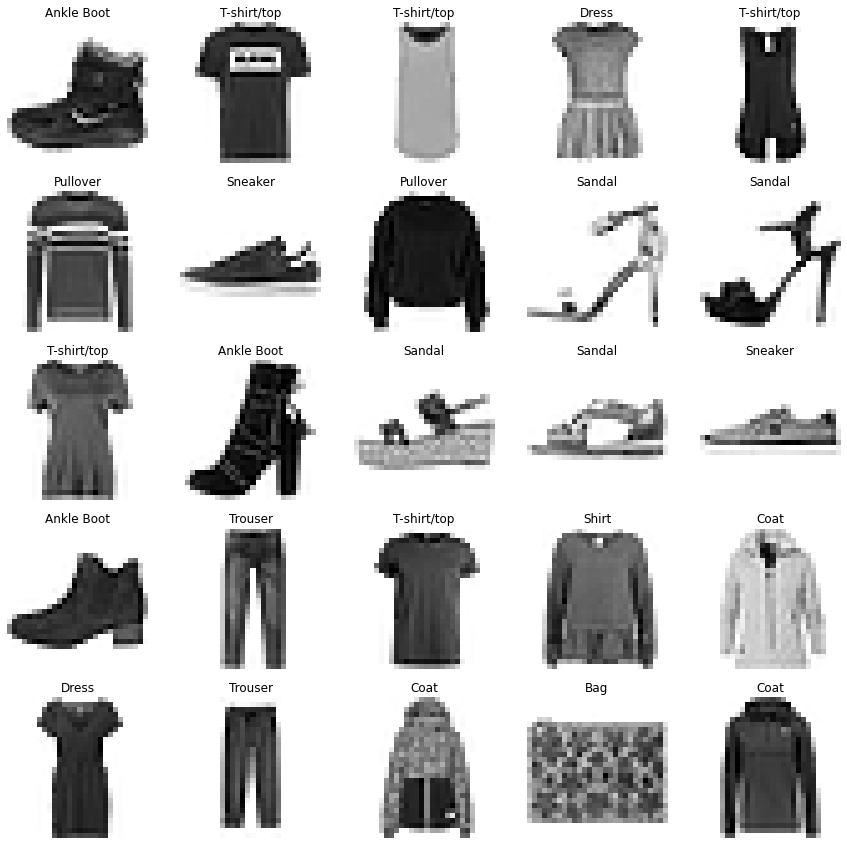

In [6]:
plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.title(classes_names[y_train[i]])
  plt.axis(False)

In [7]:
# Shape
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [8]:
# Input Shape
X_train[0].shape

(28, 28)

In [9]:
# Normalizing for better results
X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

## First model

In [10]:
tf.random.set_seed(42)

clothes_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

clothes_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_1 = clothes_model_1.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))


Epoch 1/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.4995 - accuracy: 0.8234 - val_loss: 0.4157 - val_accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.3681 - accuracy: 0.8665 - val_loss: 0.4468 - val_accuracy: 0.8442
Epoch 3/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.3350 - accuracy: 0.8759 - val_loss: 0.3898 - val_accuracy: 0.8579
Epoch 4/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.3117 - accuracy: 0.8855 - val_loss: 0.3912 - val_accuracy: 0.8593
Epoch 5/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.2963 - accuracy: 0.8897 - val_loss: 0.3631 - val_accuracy: 0.8683
Epoch 6/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2822 - accuracy: 0.8950 - val_loss: 0.3786 - val_accuracy: 0.8569
Epoch 7/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.2734 - accuracy: 0.8974 - val_loss: 0.3610 -

In [11]:
import pandas as pd

<AxesSubplot:>

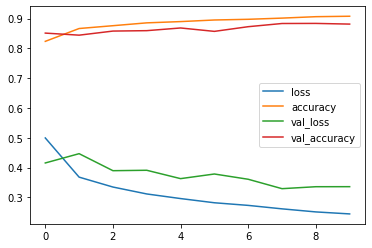

In [12]:
pd.DataFrame(clothes_history_1.history).plot()

# Finding best learning rate

In [13]:
tf.random.set_seed(42)

clothes_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch/20))

clothes_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_2 = clothes_model_2.fit(X_train_norm, y_train, epochs=40, callbacks=[lr_callback], validation_data=(X_test_norm, y_test))


Epoch 1/40
1875/1875 [==============================] - 2s 839us/step - loss: 0.4995 - accuracy: 0.8234 - val_loss: 0.4157 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 792us/step - loss: 0.3720 - accuracy: 0.8643 - val_loss: 0.4423 - val_accuracy: 0.8489 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 798us/step - loss: 0.3415 - accuracy: 0.8747 - val_loss: 0.3917 - val_accuracy: 0.8591 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 792us/step - loss: 0.3245 - accuracy: 0.8820 - val_loss: 0.4127 - val_accuracy: 0.8537 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 797us/step - loss: 0.3143 - accuracy: 0.8831 - val_loss: 0.3603 - val_accuracy: 0.8702 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 824us/step - loss: 0.3027 - accuracy: 0.8867 - val_loss: 0.3865 - val_accuracy: 0.8544 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

In [14]:
import matplotlib.pyplot as plt

In [15]:
learning_rates = 0.001 * 10 ** (tf.range(40)/20)
learning_rates

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

Text(0.5, 1.0, 'Finding the best Learning Rate')

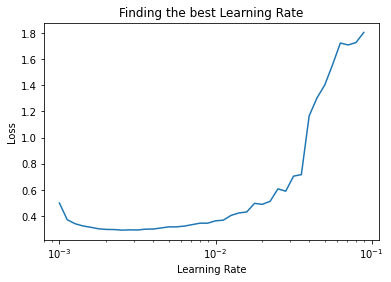

In [16]:
plt.semilogx(learning_rates, clothes_history_2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the best Learning Rate')

## Probably the best lr = 0.001, so default for Adam

In [17]:
tf.random.set_seed(42)

clothes_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

clothes_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_3 = clothes_model_3.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
1875/1875 [==============================] - 2s 883us/step - loss: 0.4995 - accuracy: 0.8234 - val_loss: 0.4157 - val_accuracy: 0.8511
Epoch 2/20
1875/1875 [==============================] - 1s 776us/step - loss: 0.3681 - accuracy: 0.8665 - val_loss: 0.4468 - val_accuracy: 0.8442
Epoch 3/20
1875/1875 [==============================] - 1s 781us/step - loss: 0.3350 - accuracy: 0.8759 - val_loss: 0.3898 - val_accuracy: 0.8579
Epoch 4/20
1875/1875 [==============================] - 1s 781us/step - loss: 0.3117 - accuracy: 0.8855 - val_loss: 0.3912 - val_accuracy: 0.8593
Epoch 5/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.2963 - accuracy: 0.8897 - val_loss: 0.3631 - val_accuracy: 0.8683
Epoch 6/20
1875/1875 [==============================] - 2s 813us/step - loss: 0.2822 - accuracy: 0.8950 - val_loss: 0.3786 - val_accuracy: 0.8569
Epoch 7/20
1875/1875 [==============================] - 1s 799us/step - loss: 0.2734 - accuracy: 0.8974 - val_loss: 0.3610 -

# Evaluating

In [18]:
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [19]:
from tensorflow.python.ops.gen_math_ops import arg_max
y_pred = clothes_model_3.predict(X_test_norm)
y_pred = tf.argmax(y_pred, axis=-1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5], dtype=int64)>

In [20]:
Conf_M = confusion_matrix(y_test, y_pred)
Conf_M

array([[868,   2,  10,  13,   5,   1,  95,   0,   6,   0],
       [  2, 979,   0,  11,   5,   0,   1,   0,   2,   0],
       [ 22,   1, 793,   8, 120,   0,  55,   0,   1,   0],
       [ 33,   9,  12, 858,  54,   0,  29,   0,   5,   0],
       [  1,   1,  74,  18, 878,   0,  27,   0,   1,   0],
       [  0,   0,   0,   1,   0, 960,   0,  23,   1,  15],
       [139,   0,  82,  13, 131,   0, 623,   0,  12,   0],
       [  0,   0,   0,   0,   0,  17,   0, 968,   1,  14],
       [  5,   0,   5,   1,   6,   3,   4,   2, 974,   0],
       [  0,   0,   0,   0,   0,  11,   1,  48,   0, 940]], dtype=int64)

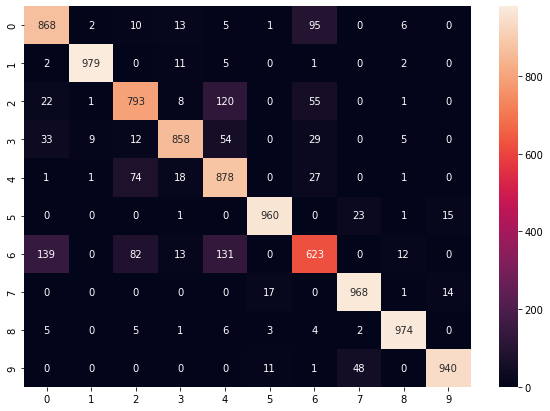

In [21]:
plt.figure(figsize=(10, 7))
heatmap(Conf_M, annot=True, fmt='d');

In [22]:
import random

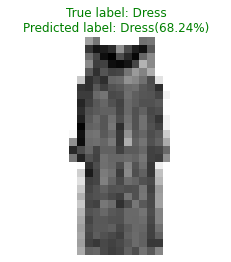

In [23]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.title(f'True label: {true_label}\nPredicted label: {pred_label}({pred_probs.max()*100:.2f}%)', c='g' if pred_label == true_label else 'r')
  plt.axis(False)

plot_random_image(clothes_model_3, X_test_norm, y_test, classes_names)

# Checking Patterns which model recognised

In [24]:
clothes_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [25]:
clothes_model_3.layers

In [26]:
clothes_model_3.layers[2].get_weights()

[array([[ 0.22977683, -0.02484239,  0.5830752 , ...,  0.0991788 ,
         -0.10096854,  0.24411313],
        [ 0.43186218, -0.40977728,  0.22636467, ...,  0.18193685,
         -0.51998806,  0.42884624],
        [-0.06618292, -0.38399383, -0.19764125, ...,  0.13162939,
         -0.06150413, -0.31956974],
        ...,
        [ 0.01805598,  0.43206206,  0.32021585, ..., -0.20329513,
          0.06390385, -0.02112961],
        [-0.18426238, -0.01402015, -0.13410875, ..., -0.05942649,
         -0.0617407 ,  0.08460924],
        [ 0.2555055 ,  0.12824099,  0.00637944, ...,  0.7352479 ,
          0.13216855, -0.23124716]], dtype=float32),
 array([ 0.03905263,  0.23006098,  0.5063272 , -0.09252208,  0.29106444,
        -0.04364362,  0.097878  ,  0.15558693,  0.12412972,  0.04231256,
         0.22913432,  0.21998678,  0.23498969,  0.38951465,  0.13058278,
         0.04413498, -0.08809493,  0.42138466,  0.6165969 , -0.17386131,
         0.4140234 ,  0.72154015,  0.2104545 ,  0.42537627,  0.172

In [28]:
tf.keras.utils.plot_model(clothes_model_3, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### (Avaialble on Google Colab)